In [3]:
import pandas as pd
import numpy as np
import os

# recuperation des données

## Premier dataset (UWF_TestZeekData24)

### Création des fonctions

In [38]:
# Load data
def load_data(data_path):
    return pd.read_csv(data_path)

#clean data
def clean_data_1(df):

    #On renomme les colonnes
    df.rename(columns={'proto': 'protocol'}, inplace=True)
    df.rename(columns={'src_ip_zeek': 'src_ip'}, inplace=True)
    df.rename(columns={'dest_ip_zeek': 'dest_ip'}, inplace=True)
    df.rename(columns={'src_port_zeek': 'src_port'}, inplace=True)
    df.rename(columns={'dest_port_zeek': 'dest_port'}, inplace=True)
    return df

#save data
def save_data(df, data_path):
    df.to_csv(data_path, index=False)
    
#Get all csv files in a directory and its subdirectories    
def get_csv_files(data_dir):
    csv_files = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".csv"):
                sub_dir = os.path.basename(root)
                csv_files.append((sub_dir, file))
    return csv_files

### Transformation

In [39]:
DFPrincipal = pd.DataFrame()

# Recuperer les premiers fichiers csv
data_dir = 'data/brut/UWF_TestZeekData24'
csv_files = get_csv_files(data_dir)
print(csv_files)

#les charger, les nettoyer et les sauvegarder
for i in csv_files:
    sub_dir = i[0]
    file = i[1]
    data_path = data_dir+"/"+sub_dir+"/"+file
    df = load_data(data_path)
    df = clean_data_1(df)
    DFPrincipal = pd.concat([DFPrincipal, df], ignore_index=True)
print(DFPrincipal.shape)

[('Benign', 'part-00000-b039213f-1208-4f1b-b71d-5e8e3a4a2939-c000 (1).csv'), ('Credential_Access', 'part-00000-912fdc44-5727-4d42-8fd6-a0e206ba29f8-c000.csv'), ('Defense_Evasion', 'part-00000-de4985c7-284a-4b6e-b507-e69a2d172582-c000.csv'), ('Exifltration', 'part-00000-6a530c25-0f6b-46a1-ba16-c6b658ef75e8-c000 (1).csv'), ('Initial_Access', 'part-00000-9a37b839-429e-444b-82a5-a6d5e69dad7e-c000.csv'), ('Persistence', 'part-00000-fb5a764a-e65e-4e10-b6fb-1a189589d5e0-c000.csv'), ('Privilege_Escalation', 'part-00000-d8fcf83a-aed1-4cb1-babf-581208088293-c000.csv'), ('Reconnaissance', 'part-00000-49ed1cc6-3205-4c76-8e28-4da9abf78363-c000.csv')]
(95871, 26)


## Deuxième dataset (UWF_ZeekData22)

### Création des fonctions

In [40]:
def clean_data_2(df):
    #On renomme les colonnes
    df.rename(columns={'mitre_attack_tactics': 'label_tactic'}, inplace=True)  
    
    return df

### Transformation

In [ ]:
# Recuperer les deuxièmes fichiers csv
data_dir = 'data/brut/UWF_ZeekData22'
csv_files = get_csv_files(data_dir)
print(csv_files)

for i in csv_files:
    sub_dir = i[0]
    file = i[1]
    data_path = data_dir+"/"+file
    df = load_data(data_path)
    df = clean_data_2(df)
    DFPrincipal = pd.concat([DFPrincipal, df], ignore_index=True)


print(DFPrincipal.shape)
    

[('UWF_ZeekData22', '1.csv'), ('UWF_ZeekData22', '2.csv'), ('UWF_ZeekData22', '3.csv'), ('UWF_ZeekData22', '4.csv'), ('UWF_ZeekData22', '5.csv')]
(2140605, 26)
(2140605, 26)


# Graphiques 

- Distribution :
  - Des labels

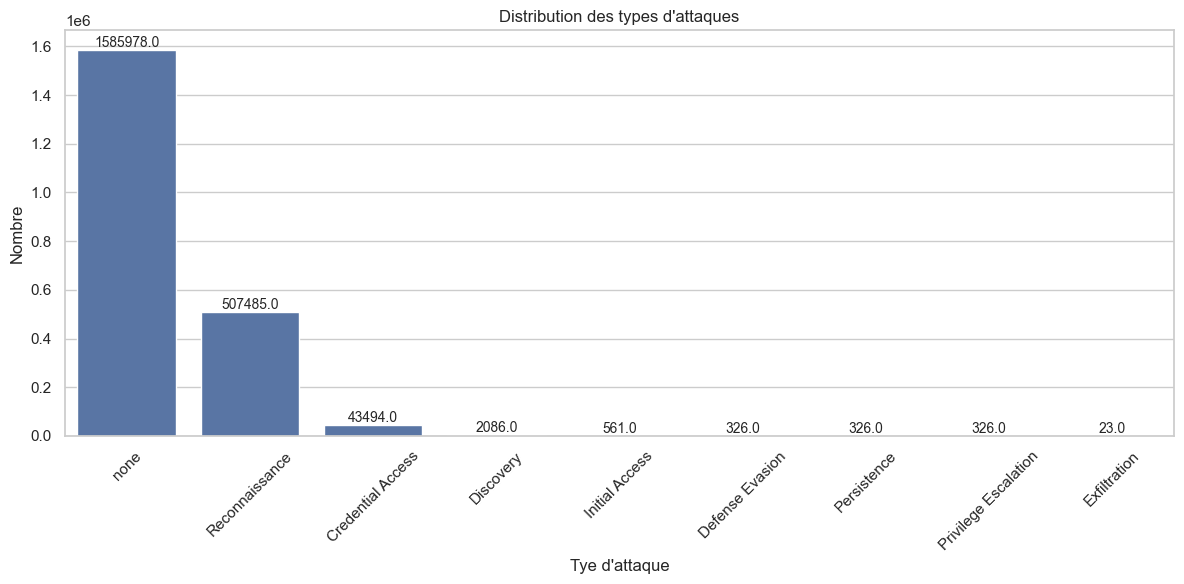

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")
# Taille de la figure
plt.figure(figsize=(12, 6))
# Creer un graphique de distribution des tactiques d'attaque
ax=sns.countplot(data=DFPrincipal, x='label_tactic', order=DFPrincipal['label_tactic'].value_counts().index)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Ajouter des étiquettes sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title("Distribution des types d'attaques")
plt.xlabel("Tye d'attaque")
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()


In [ ]:
DFPrincipalTemporel=DFPrincipal.copy()
DFPrincipalTemporel['ts'] = pd.to_datetime(DFPrincipalTemporel['ts'], unit='s')
DFPrincipalTemporel['year'] = DFPrincipalTemporel['ts'].dt.year
DFPrincipalTemporel['month'] = DFPrincipalTemporel['ts'].dt.month
DFPrincipalTemporel['day'] = DFPrincipalTemporel['ts'].dt.day
DFPrincipalTemporel['hour'] = DFPrincipalTemporel['ts'].dt.hour
DFPrincipalTemporel['minute'] = DFPrincipalTemporel['ts'].dt.minute
DFPrincipalTemporel['seconde'] = DFPrincipalTemporel['ts'].dt.second

DFPrincipalTemporel['dayofweek'] = DFPrincipalTemporel['ts'].dt.dayofweek  # 0=lundi, 6=dimanche

# Ajouter une colonne avec les noms des mois
DFPrincipalTemporel['month_name'] = DFPrincipalTemporel['month'].apply(lambda x: calendar.month_name[x])

#On sépare pour ajouter les catégories
DF_none = DFPrincipalTemporel[DFPrincipalTemporel['label_tactic'] == 'none']
DF_not_none = DFPrincipalTemporel[DFPrincipalTemporel['label_tactic'] != 'none']

DF_none['catégorie'] = 'none'
DF_not_none['catégorie'] = 'malveillant'

#On regrouppe les deux dataframes
DF_combined = pd.concat([DF_none, DF_not_none])


C:\Users\aurel\AppData\Local\Temp\ipykernel_13184\2226372310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_none['catégorie'] = 'none'
C:\Users\aurel\AppData\Local\Temp\ipykernel_13184\2226372310.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_not_none['catégorie'] = 'malveillant'


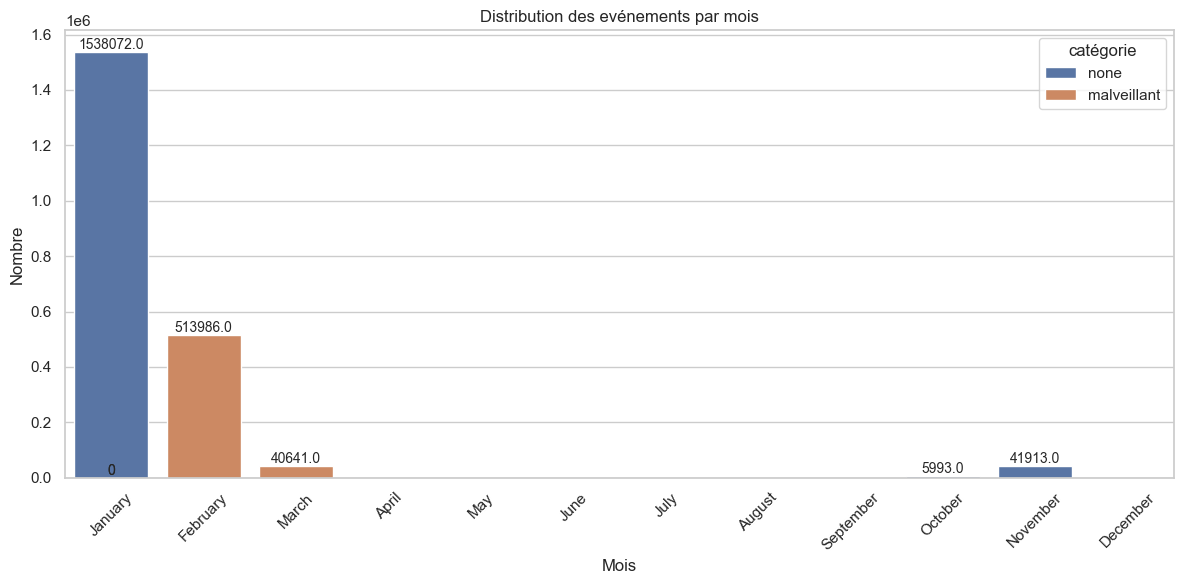

In [44]:


# Définir l'ordre explicite des mois
month_order = list(calendar.month_name[1:])  # Exclure le premier élément qui est une chaîne vide

# Set the style of seaborn
sns.set(style="whitegrid")
# Taille de la figure
plt.figure(figsize=(12, 6))
# Créer un graphique de distribution des tactiques d'attaque
ax = sns.countplot(data=DF_combined, x='month_name', hue="catégorie", order=month_order)

# Ajouter des étiquettes sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

plt.title("Distribution des evénements par mois")
plt.xlabel("Mois")
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()

In [ ]:
# Définir l'ordre explicite des mois
month_order = list(calendar.month_name[1:])  # Exclure le premier élément qui est une chaîne vide

# Set the style of seaborn
sns.set(style="whitegrid")
# Taille de la figure
plt.figure(figsize=(12, 6))
# Créer un graphique de distribution des tactiques d'attaque
ax = sns.countplot(data=DF_combined, x='month_name', hue="catégorie", order=month_order)

# Ajouter des étiquettes sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

plt.title("Distribution des evénements par mois")
plt.xlabel("Mois")
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()